## Calculations

Velocity: 0.5 L/min with uncertainty of 0.01 L/min <br>

Power: 1.0 Watts with uncertainty of 0.01 Watts <br>
(1 [Watt] /13.1533 [mm^3] )*(1e^9[mm^3]/1[m]) 

In [5]:
import numpy as np
import math
import csv
import glob
import pandas as pd
from matplotlib import pyplot
from IPython.display import HTML, display
%matplotlib inline 

In [6]:
# Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 14

## Functions

In [3]:
def stats(dataSimS0,dataSimS1,dataSimS2,dataSimS3,dataSimS4):
    ### For plotting purposes, Average values with +-2 standard deviations 
    avg0,avg1,avg2,avg3,avg4= [],[],[],[],[]
    sDev0,sDev1,sDev2,sDev3,sDev4 = [],[],[],[],[]
    i = 0
    while i < 1200:
        a0 = [dataSimS0['Monitor Point: MouthpieceAbove1mm0mmTemp (Temperature) [K]'][i]-298.15,
                        dataSimS1['Monitor Point: MouthpieceAbove1mm0mmTemp (Temperature) [K]'][i]-298.15,
                                  dataSimS2['Monitor Point: MouthpieceAbove1mm0mmTemp (Temperature) [K]'][i]-298.15,
                                            dataSimS3['Monitor Point: MouthpieceAbove1mm0mmTemp (Temperature) [K]'][i]-298.15,
                                                      dataSimS4['Monitor Point: MouthpieceAbove1mm0mmTemp (Temperature) [K]'][i]-298.15] #0mm
        a1 = [dataSimS0['Monitor Point: MouthpieceAbove1mm1mmTemp (Temperature) [K]'][i]-298.15,
                        dataSimS1['Monitor Point: MouthpieceAbove1mm1mmTemp (Temperature) [K]'][i]-298.15,
                                  dataSimS2['Monitor Point: MouthpieceAbove1mm1mmTemp (Temperature) [K]'][i]-298.15,
                                            dataSimS3['Monitor Point: MouthpieceAbove1mm1mmTemp (Temperature) [K]'][i]-298.15,
                                                      dataSimS4['Monitor Point: MouthpieceAbove1mm1mmTemp (Temperature) [K]'][i]-298.15] #1mm
        a2 = [dataSimS0['Monitor Point: MouthpieceAbove1mm2mmTemp (Temperature) [K]'][i]-298.15,
                        dataSimS1['Monitor Point: MouthpieceAbove1mm2mmTemp (Temperature) [K]'][i]-298.15,
                                  dataSimS2['Monitor Point: MouthpieceAbove1mm2mmTemp (Temperature) [K]'][i]-298.15,
                                            dataSimS3['Monitor Point: MouthpieceAbove1mm2mmTemp (Temperature) [K]'][i]-298.15,
                                                      dataSimS4['Monitor Point: MouthpieceAbove1mm2mmTemp (Temperature) [K]'][i]-298.15] #2mm
        a3 = [dataSimS0['Monitor Point: MouthpieceAbove1mm3mmTemp (Temperature) [K]'][i]-298.15,
                        dataSimS1['Monitor Point: MouthpieceAbove1mm3mmTemp (Temperature) [K]'][i]-298.15,
                                  dataSimS2['Monitor Point: MouthpieceAbove1mm3mmTemp (Temperature) [K]'][i]-298.15,
                                            dataSimS3['Monitor Point: MouthpieceAbove1mm3mmTemp (Temperature) [K]'][i]-298.15,
                                                      dataSimS4['Monitor Point: MouthpieceAbove1mm3mmTemp (Temperature) [K]'][i]-298.15] #3mm
        a4 = [dataSimS0['Monitor Point: MouthpieceAbove1mm4mmTemp (Temperature) [K]'][i]-298.15,
                        dataSimS1['Monitor Point: MouthpieceAbove1mm4mmTemp (Temperature) [K]'][i]-298.15,
                                  dataSimS2['Monitor Point: MouthpieceAbove1mm4mmTemp (Temperature) [K]'][i]-298.15,
                                            dataSimS3['Monitor Point: MouthpieceAbove1mm4mmTemp (Temperature) [K]'][i]-298.15,
                                                      dataSimS4['Monitor Point: MouthpieceAbove1mm4mmTemp (Temperature) [K]'][i]-298.15] #4mm
        avg0.append(np.average(a0))
        avg1.append(np.average(a1))
        avg2.append(np.average(a2))
        avg3.append(np.average(a3))
        avg4.append(np.average(a4))
        sDev0.append(np.std(a0))
        sDev1.append(np.std(a1))
        sDev2.append(np.std(a2))
        sDev3.append(np.std(a3))
        sDev4.append(np.std(a4))
        i +=1
    return avg0,avg1,avg2,avg3,avg4,sDev0,sDev1,sDev2,sDev3,sDev4

## Experiments

In [7]:
data_Exp1W_05lm = pd.read_csv('../data_exp/exp_1W_0.5LPM.csv')  # Power 1 Watt, Airflow 0.5 L/min
data_Exp1W_05lm.tail()
data_time = data_Exp1W_05lm['Time']
# data_Exp1W_05lm.tail()
data_Exp1W_05lm_T1 = [data_Exp1W_05lm['T1_t1'],data_Exp1W_05lm['T1_t2'],data_Exp1W_05lm['T1_t3']]
data_Exp1W_05lm_T2 = [data_Exp1W_05lm['T2_t1'],data_Exp1W_05lm['T2_t2'],data_Exp1W_05lm['T2_t3']]
data_Exp1W_05lm_T3 = [data_Exp1W_05lm['T3_t1'],data_Exp1W_05lm['T3_t2'],data_Exp1W_05lm['T3_t3']]
data_Exp1W_05lm_T4 = [data_Exp1W_05lm['T4_t1'],data_Exp1W_05lm['T4_t2'],data_Exp1W_05lm['T4_t3']]

In [8]:
### For plotting purposes, Average values with +-2 standard deviations 
i = 75 #Start here because there are a lot of power off values. 
average0,average1,average2,average4 = [],[],[],[]
sDev0E,sDev1E,sDev2E,sDev4E = [],[],[],[]
plus0E,plus1E,plus2E,plus4E = [],[],[],[]
minus0E,minus1E,minus2E,minus4E = [],[],[],[]
while i < 150:
    a4E = [data_Exp1W_05lm_T4[0][i],data_Exp1W_05lm_T4[1][i],data_Exp1W_05lm_T4[2][i]] #4mm
    a2E = [data_Exp1W_05lm_T1[0][i],data_Exp1W_05lm_T1[1][i],data_Exp1W_05lm_T1[2][i]] #2mm
    a1E = [data_Exp1W_05lm_T3[0][i],data_Exp1W_05lm_T3[1][i],data_Exp1W_05lm_T3[2][i]] #1mm    average.append(np.average(a)) 
    a0E = [data_Exp1W_05lm_T2[0][i],data_Exp1W_05lm_T2[1][i],data_Exp1W_05lm_T2[2][i]] #center
    average0.append(np.average(a0E))
    average1.append(np.average(a1E))
    average2.append(np.average(a2E))
    average4.append(np.average(a4E))
    sDev0E.append(np.std(a0E))
    sDev1E.append(np.std(a1E))
    sDev2E.append(np.std(a2E))
    sDev4E.append(np.std(a4E))
    i +=1
    
plus0E=np.zeros_like(average0 )
plus1E=np.zeros_like(average1 )
plus2E=np.zeros_like(average2 )
plus4E=np.zeros_like(average4 )
minus0E=np.zeros_like(average0)
minus1E=np.zeros_like(average1)
minus2E=np.zeros_like(average2)
minus4E=np.zeros_like(average4)
    
m = 0
while m < len(average0):
    # Take the largest standard deviation and apply that across all averages 
    plus0E[m]=average0[m] + 1.8 #+ max(sDev0)
    plus1E[m]=average1[m] + 1.8 #+ max(sDev1)
    plus2E[m]=average2[m] + 1.8 #+ max(sDev2)
    plus4E[m]=average4[m] + 1.8 #+ max(sDev4)
    minus0E[m]=average0[m] - 1.8 #- max(sDev0)
    minus1E[m]=average1[m] - 1.8 #- max(sDev1)
    minus2E[m]=average2[m] - 1.8 #- max(sDev2)
    minus4E[m]=average4[m] - 1.8 #- max(sDev4)
    m+=1

## Input data - propogating uncertainties
Using Latin Hypercube sampling in Dakota I generated samples by propogating the uncertainty from 2 parameters: Inlet Volumetric Flow Rate, Applied power. 

Assuming applied power is turned on and off for 2seconds. 

In [35]:
table = pd.read_table('edds_lhs.dat',sep="\s+")
vfr = table['x1']      # volumetric flow rate [L/min]
powerraw = table['x2'] # [W]

In [36]:
vfr[0]

0.4944398634

In [40]:
vfr_m3sec = vfr / (6*10**4)           # m^3/sec
diameter = 4.54                 # inlet diameter [mm]
diameterm = diameter/(10**3)    # inlet diameter [m]
radius = diameterm/2 
vel = vfr_m3sec /(math.pi*(radius**2))
vel

0    0.509050
1    0.511969
2    0.521597
3    0.524647
4    0.506329
5    0.508736
6    0.522408
7    0.523394
8    0.514536
9    0.505615
Name: x1, dtype: float64

In [41]:
velocity = (vfr*0.51775)/(0.5)
power = (powerraw/13.1533)*(10**9 /1)

In [43]:
samples_velocity = pd.DataFrame( {'OLD': velocity, 'NEW':vel, 'Raw': vfr, })
samples_velocity

,OLD,NEW,Raw
0,0.511992,0.509050,0.494440
1,0.514928,0.511969,0.497275
2,0.524612,0.521597,0.506627
3,0.527679,0.524647,0.509589
4,0.509255,0.506329,0.491796
5,0.511676,0.508736,0.494134
6,0.525428,0.522408,0.507415
7,0.526419,0.523394,0.508372
8,0.517510,0.514536,0.499768
9,0.508538,0.505615,0.491104


In [45]:
sampleID = ['sample 1','sample 2','sample 3','sample 4','sample 5','sample 6','sample 7','sample 8','sample 9','sample 10']
samples = pd.DataFrame( {'Sample':sampleID,'Velocity [m/s]': vel, 'Power [W]':powerraw, 'Power/volume [W/m^3]': power, })

In [46]:
samples

,Sample,Velocity [m/s],Power [W],Power/volume [W/m^3]
0,sample 1,0.509050,0.993541,7.553552e+07
1,sample 2,0.511969,0.997659,7.584858e+07
2,sample 3,0.521597,0.992968,7.549193e+07
3,sample 4,0.524647,0.999908,7.601957e+07
4,sample 5,0.506329,0.998083,7.588079e+07
5,sample 6,0.508736,0.993967,7.556791e+07
6,sample 7,0.522408,0.995184,7.566042e+07
7,sample 8,0.523394,0.991877,7.540900e+07
8,sample 9,0.514536,0.996117,7.573137e+07
9,sample 10,0.505615,0.994866,7.563626e+07


## QOI - Temperatuer at Mouthpiece Analysis

In [10]:
# dataExp = pd.read_csv("../data_exp/exp_1W_0.5LPM.csv")
# data_time = dataExp['Time']
dataSimS0 = pd.read_csv("output/output_Sample0.csv")
dataSimS1 = pd.read_csv("output/output_Sample1.csv")
dataSimS2 = pd.read_csv("output/output_Sample2.csv")
dataSimS3 = pd.read_csv("output/output_Sample3.csv")
dataSimS4 = pd.read_csv("output/output_Sample4.csv")

In [11]:
# Calculate the averages and SD over samples at each time step
avg0,avg1,avg2,avg3,avg4,sDev0,sDev1,sDev2,sDev3,sDev4 = stats(dataSimS0,dataSimS1,dataSimS2,dataSimS3,dataSimS4)
# Take the largest standard deviation and apply that across all averages 
plus0=avg0 + max(sDev0)
plus1=avg1 + max(sDev1)
plus2=avg2 + max(sDev2)
plus3=avg3 + max(sDev3)
plus4=avg4 + max(sDev4)
minus0=avg0 - max(sDev0)
minus1=avg1 - max(sDev1)
minus2=avg2 - max(sDev2)
minus3=avg3 - max(sDev3)
minus4=avg4 - max(sDev4)

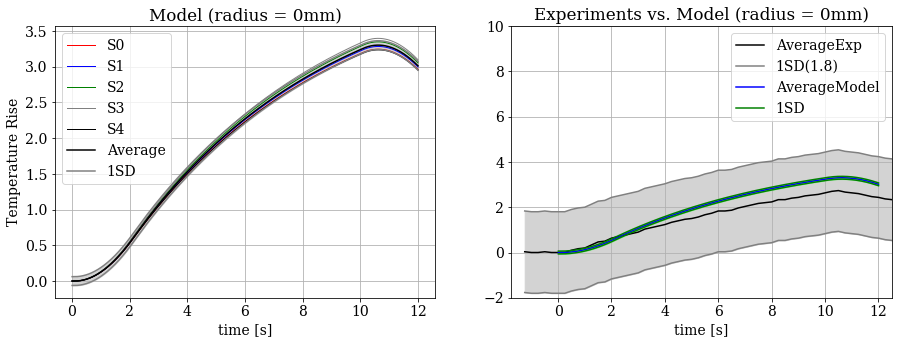

In [31]:
pyplot.figure(figsize=(15,5))
pyplot.subplot(1, 2, 1)
pyplot.title('Model (radius = 0mm)')
pyplot.xlabel('time [s]')
pyplot.ylabel('Temperature Rise')
pyplot.plot(dataSimS0["Time [s]"], dataSimS0['Monitor Point: MouthpieceAbove1mm0mmTemp (Temperature) [K]']-298.15,label="S0",color="red",linewidth=1)
pyplot.plot(dataSimS1["Time [s]"], dataSimS1['Monitor Point: MouthpieceAbove1mm0mmTemp (Temperature) [K]']-298.15,label="S1",color="blue",linewidth=1)
pyplot.plot(dataSimS2["Time [s]"], dataSimS2['Monitor Point: MouthpieceAbove1mm0mmTemp (Temperature) [K]']-298.15,label="S2",color="green",linewidth=1)
pyplot.plot(dataSimS3["Time [s]"], dataSimS3['Monitor Point: MouthpieceAbove1mm0mmTemp (Temperature) [K]']-298.15,label="S3",color="gray",linewidth=1)
pyplot.plot(dataSimS4["Time [s]"], dataSimS4['Monitor Point: MouthpieceAbove1mm0mmTemp (Temperature) [K]']-298.15,label="S4",color="black",linewidth=1)

pyplot.plot(dataSimS0["Time [s]"], avg0,linestyle='-',label="Average",color="black")
pyplot.plot(dataSimS0["Time [s]"], plus0,linestyle='-',label="1SD",color="gray")
pyplot.plot(dataSimS0["Time [s]"], minus0,linestyle='-',color="gray")
pyplot.fill_between(dataSimS0["Time [s]"],plus0, minus0, color="lightgray")

pyplot.legend()
pyplot.grid()
pyplot.subplot(1, 2, 2)
pyplot.title('Experiments vs. Model (radius = 0mm)')
pyplot.xlabel('time [s]')
pyplot.plot(data_time[75:150]-20, average0,linestyle='-',label="AverageExp",color="black")
pyplot.plot(data_time[75:150]-20, plus0E,linestyle='-',label="1SD(1.8)",color="gray")
pyplot.plot(data_time[75:150]-20, minus0E,linestyle='-',color="gray")
pyplot.fill_between(data_time[75:150]-20,plus0E, minus0E, color="lightgray")
pyplot.xlim([-1.75, 12.5])

pyplot.plot(dataSimS0["Time [s]"], avg0,linestyle='-',label="AverageModel",color="blue")
pyplot.plot(dataSimS0["Time [s]"], plus0,linestyle='-',label="1SD",color="green")
pyplot.plot(dataSimS0["Time [s]"], minus0,linestyle='-',color="green")
pyplot.fill_between(dataSimS0["Time [s]"],plus0, minus0, color="lightgreen")
pyplot.xlim([-1.75, 12.5])
pyplot.ylim([-2, 10])

pyplot.legend()
pyplot.grid()




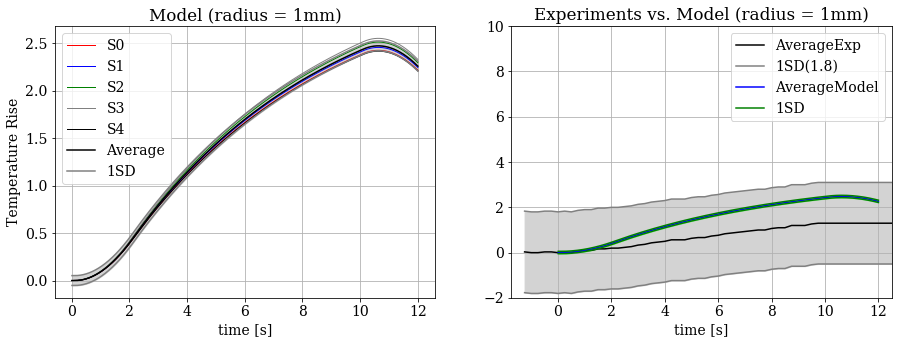

In [32]:
pyplot.figure(figsize=(15,5))
pyplot.subplot(1, 2, 1)
pyplot.title('Model (radius = 1mm)')
pyplot.xlabel('time [s]')
pyplot.ylabel('Temperature Rise')
pyplot.plot(dataSimS0["Time [s]"], dataSimS0['Monitor Point: MouthpieceAbove1mm1mmTemp (Temperature) [K]']-298.15,label="S0",color="red",linewidth=1)
pyplot.plot(dataSimS1["Time [s]"], dataSimS1['Monitor Point: MouthpieceAbove1mm1mmTemp (Temperature) [K]']-298.15,label="S1",color="blue",linewidth=1)
pyplot.plot(dataSimS2["Time [s]"], dataSimS2['Monitor Point: MouthpieceAbove1mm1mmTemp (Temperature) [K]']-298.15,label="S2",color="green",linewidth=1)
pyplot.plot(dataSimS3["Time [s]"], dataSimS3['Monitor Point: MouthpieceAbove1mm1mmTemp (Temperature) [K]']-298.15,label="S3",color="gray",linewidth=1)
pyplot.plot(dataSimS4["Time [s]"], dataSimS4['Monitor Point: MouthpieceAbove1mm1mmTemp (Temperature) [K]']-298.15,label="S4",color="black",linewidth=1)

pyplot.plot(dataSimS0["Time [s]"], avg1,linestyle='-',label="Average",color="black")
pyplot.plot(dataSimS0["Time [s]"], plus1,linestyle='-',label="1SD",color="gray")
pyplot.plot(dataSimS0["Time [s]"], minus1,linestyle='-',color="gray")
pyplot.fill_between(dataSimS0["Time [s]"],plus1, minus1, color="lightgray")

pyplot.legend()
pyplot.grid()
pyplot.subplot(1, 2, 2)
pyplot.title('Experiments vs. Model (radius = 1mm)')
pyplot.xlabel('time [s]')
pyplot.plot(data_time[75:150]-20, average1,linestyle='-',label="AverageExp",color="black")
pyplot.plot(data_time[75:150]-20, plus1E,linestyle='-',label="1SD(1.8)",color="gray")
pyplot.plot(data_time[75:150]-20, minus1E,linestyle='-',color="gray")
pyplot.fill_between(data_time[75:150]-20,plus1E, minus1E, color="lightgray")
pyplot.xlim([-1.75, 12.5])

pyplot.plot(dataSimS0["Time [s]"], avg1,linestyle='-',label="AverageModel",color="blue")
pyplot.plot(dataSimS0["Time [s]"], plus1,linestyle='-',label="1SD",color="green")
pyplot.plot(dataSimS0["Time [s]"], minus1,linestyle='-',color="green")
pyplot.fill_between(dataSimS0["Time [s]"],plus1, minus1, color="lightgreen")
pyplot.xlim([-1.75, 12.5])
pyplot.ylim([-2, 10])

pyplot.legend()
pyplot.grid()

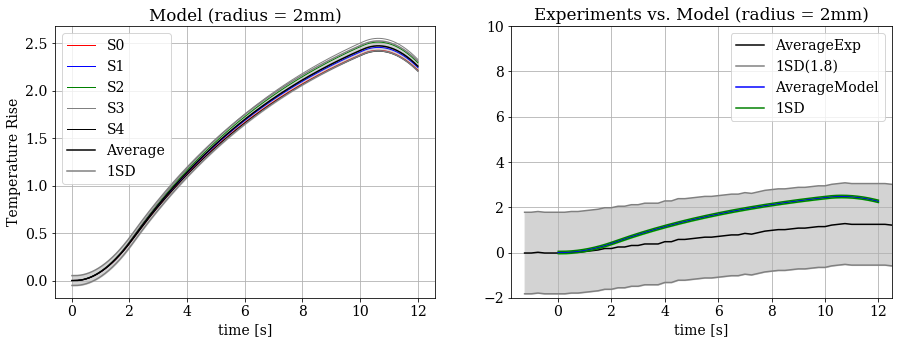

In [33]:
pyplot.figure(figsize=(15,5))
pyplot.subplot(1, 2, 1)
pyplot.title('Model (radius = 2mm)')
pyplot.xlabel('time [s]')
pyplot.ylabel('Temperature Rise')
pyplot.plot(dataSimS0["Time [s]"], dataSimS0['Monitor Point: MouthpieceAbove1mm2mmTemp (Temperature) [K]']-298.15,label="S0",color="red",linewidth=1)
pyplot.plot(dataSimS1["Time [s]"], dataSimS1['Monitor Point: MouthpieceAbove1mm2mmTemp (Temperature) [K]']-298.15,label="S1",color="blue",linewidth=1)
pyplot.plot(dataSimS2["Time [s]"], dataSimS2['Monitor Point: MouthpieceAbove1mm2mmTemp (Temperature) [K]']-298.15,label="S2",color="green",linewidth=1)
pyplot.plot(dataSimS3["Time [s]"], dataSimS3['Monitor Point: MouthpieceAbove1mm2mmTemp (Temperature) [K]']-298.15,label="S3",color="gray",linewidth=1)
pyplot.plot(dataSimS4["Time [s]"], dataSimS4['Monitor Point: MouthpieceAbove1mm2mmTemp (Temperature) [K]']-298.15,label="S4",color="black",linewidth=1)

pyplot.plot(dataSimS0["Time [s]"], avg2,linestyle='-',label="Average",color="black")
pyplot.plot(dataSimS0["Time [s]"], plus2,linestyle='-',label="1SD",color="gray")
pyplot.plot(dataSimS0["Time [s]"], minus2,linestyle='-',color="gray")
pyplot.fill_between(dataSimS0["Time [s]"],plus2, minus2, color="lightgray")

pyplot.legend()
pyplot.grid()
pyplot.subplot(1, 2, 2)
pyplot.title('Experiments vs. Model (radius = 2mm)')
pyplot.xlabel('time [s]')
pyplot.plot(data_time[75:150]-20, average2,linestyle='-',label="AverageExp",color="black")
pyplot.plot(data_time[75:150]-20, plus2E,linestyle='-',label="1SD(1.8)",color="gray")
pyplot.plot(data_time[75:150]-20, minus2E,linestyle='-',color="gray")
pyplot.fill_between(data_time[75:150]-20,plus2E, minus2E, color="lightgray")
pyplot.xlim([-1.75, 12.5])

pyplot.plot(dataSimS0["Time [s]"], avg2,linestyle='-',label="AverageModel",color="blue")
pyplot.plot(dataSimS0["Time [s]"], plus2,linestyle='-',label="1SD",color="green")
pyplot.plot(dataSimS0["Time [s]"], minus2,linestyle='-',color="green")
pyplot.fill_between(dataSimS0["Time [s]"],plus2, minus2, color="lightgreen")
pyplot.xlim([-1.75, 12.5])
pyplot.ylim([-2, 10])

pyplot.legend()
pyplot.grid()

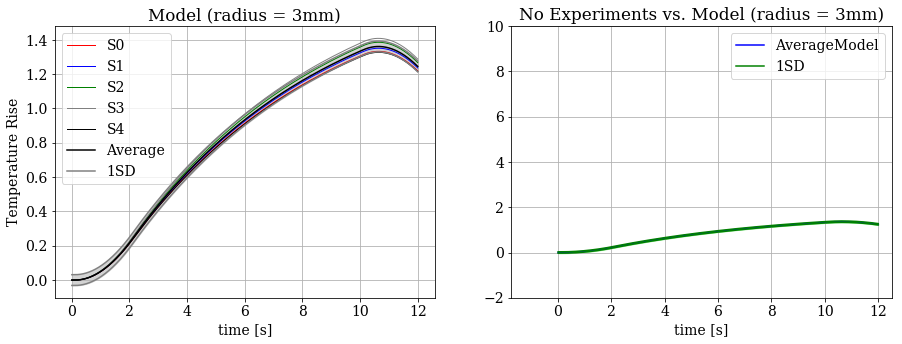

In [34]:
pyplot.figure(figsize=(15,5))
pyplot.subplot(1, 2, 1)
pyplot.title('Model (radius = 3mm)')
pyplot.xlabel('time [s]')
pyplot.ylabel('Temperature Rise')
pyplot.plot(dataSimS0["Time [s]"], dataSimS0['Monitor Point: MouthpieceAbove1mm3mmTemp (Temperature) [K]']-298.15,label="S0",color="red",linewidth=1)
pyplot.plot(dataSimS1["Time [s]"], dataSimS1['Monitor Point: MouthpieceAbove1mm3mmTemp (Temperature) [K]']-298.15,label="S1",color="blue",linewidth=1)
pyplot.plot(dataSimS2["Time [s]"], dataSimS2['Monitor Point: MouthpieceAbove1mm3mmTemp (Temperature) [K]']-298.15,label="S2",color="green",linewidth=1)
pyplot.plot(dataSimS3["Time [s]"], dataSimS3['Monitor Point: MouthpieceAbove1mm3mmTemp (Temperature) [K]']-298.15,label="S3",color="gray",linewidth=1)
pyplot.plot(dataSimS4["Time [s]"], dataSimS4['Monitor Point: MouthpieceAbove1mm3mmTemp (Temperature) [K]']-298.15,label="S4",color="black",linewidth=1)


pyplot.plot(dataSimS0["Time [s]"], avg3,linestyle='-',label="Average",color="black")
pyplot.plot(dataSimS0["Time [s]"], plus3,linestyle='-',label="1SD",color="gray")
pyplot.plot(dataSimS0["Time [s]"], minus3,linestyle='-',color="gray")
pyplot.fill_between(dataSimS0["Time [s]"],plus3, minus3, color="lightgray")

pyplot.legend()
pyplot.grid()
pyplot.subplot(1, 2, 2)
pyplot.title('No Experiments vs. Model (radius = 3mm)')
pyplot.xlabel('time [s]')
# pyplot.plot(data_time[75:150]-20, average3,linestyle='-',label="AverageExp",color="black")
# pyplot.plot(data_time[75:150]-20, plus3E,linestyle='-',label="1SD(1.8)",color="gray")
# pyplot.plot(data_time[75:150]-20, minus3E,linestyle='-',label="-2SD",color="gray")
# pyplot.fill_between(data_time[75:150]-20,plus3E, minus3E, color="lightgray")
# pyplot.xlim([-1.75, 12.5])

pyplot.plot(dataSimS0["Time [s]"], avg3,linestyle='-',label="AverageModel",color="blue")
pyplot.plot(dataSimS0["Time [s]"], plus3,linestyle='-',label="1SD",color="green")
pyplot.plot(dataSimS0["Time [s]"], minus3,linestyle='-',color="green")
pyplot.fill_between(dataSimS0["Time [s]"],plus3, minus3, color="lightgreen")
pyplot.xlim([-1.75, 12.5])
pyplot.ylim([-2, 10])

pyplot.legend()
pyplot.grid()

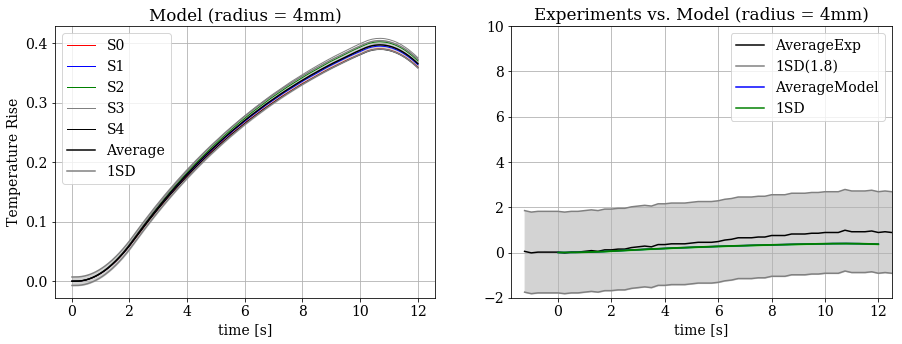

In [35]:
pyplot.figure(figsize=(15,5))
pyplot.subplot(1, 2, 1)
pyplot.title('Model (radius = 4mm)')
pyplot.xlabel('time [s]')
pyplot.ylabel('Temperature Rise')
pyplot.plot(dataSimS0["Time [s]"], dataSimS0['Monitor Point: MouthpieceAbove1mm4mmTemp (Temperature) [K]']-298.15,label="S0",color="red",linewidth=1)
pyplot.plot(dataSimS1["Time [s]"], dataSimS1['Monitor Point: MouthpieceAbove1mm4mmTemp (Temperature) [K]']-298.15,label="S1",color="blue",linewidth=1)
pyplot.plot(dataSimS2["Time [s]"], dataSimS2['Monitor Point: MouthpieceAbove1mm4mmTemp (Temperature) [K]']-298.15,label="S2",color="green",linewidth=1)
pyplot.plot(dataSimS3["Time [s]"], dataSimS3['Monitor Point: MouthpieceAbove1mm4mmTemp (Temperature) [K]']-298.15,label="S3",color="gray",linewidth=1)
pyplot.plot(dataSimS4["Time [s]"], dataSimS4['Monitor Point: MouthpieceAbove1mm4mmTemp (Temperature) [K]']-298.15,label="S4",color="black",linewidth=1)


pyplot.plot(dataSimS0["Time [s]"], avg4,linestyle='-',label="Average",color="black")
pyplot.plot(dataSimS0["Time [s]"], plus4,linestyle='-',label="1SD",color="gray")
pyplot.plot(dataSimS0["Time [s]"], minus4,linestyle='-',color="gray")
pyplot.fill_between(dataSimS0["Time [s]"],plus4, minus4, color="lightgray")

pyplot.legend()
pyplot.grid()
pyplot.subplot(1, 2, 2)
pyplot.title('Experiments vs. Model (radius = 4mm)')
pyplot.xlabel('time [s]')
pyplot.plot(data_time[75:150]-20, average4,linestyle='-',label="AverageExp",color="black")
pyplot.plot(data_time[75:150]-20, plus4E,linestyle='-',label="1SD(1.8)",color="gray")
pyplot.plot(data_time[75:150]-20, minus4E,linestyle='-',color="gray")
pyplot.fill_between(data_time[75:150]-20,plus4E, minus4E, color="lightgray")
pyplot.xlim([-1.75, 12.5])

pyplot.plot(dataSimS0["Time [s]"], avg4,linestyle='-',label="AverageModel",color="blue")
pyplot.plot(dataSimS0["Time [s]"], plus4,linestyle='-',label="1SD",color="green")
pyplot.plot(dataSimS0["Time [s]"], minus4,linestyle='-',color="green")
pyplot.fill_between(dataSimS0["Time [s]"],plus4, minus4, color="lightgreen")
pyplot.xlim([-1.75, 12.5])
pyplot.ylim([-2, 10])

pyplot.legend()
pyplot.grid()

## Probabilistic Analysis 

In [69]:
from statsmodels.distributions.empirical_distribution import ECDF

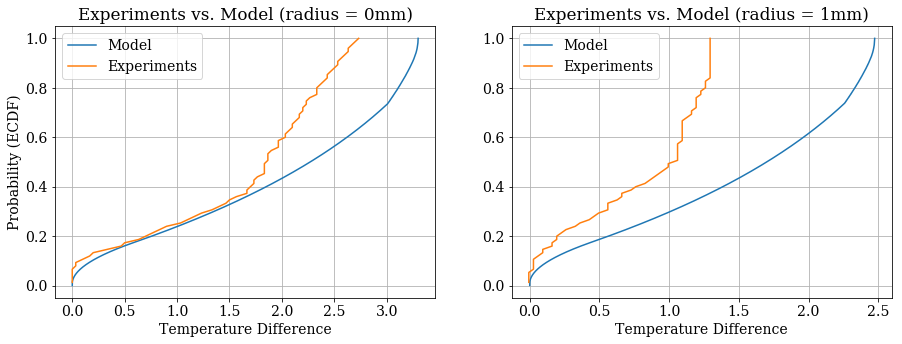

In [94]:
pyplot.figure(figsize=(15,5))
pyplot.subplot(1, 2, 1)
pyplot.title('Experiments vs. Model (radius = 0mm)')
pyplot.xlabel('Temperature Difference')
pyplot.ylabel('Probability (ECDF)')
ecdf = ECDF(avg0)
ecdfE = ECDF(average0)
pyplot.plot(ecdf.x,ecdf.y, label= "Model")
pyplot.plot(ecdfE.x,ecdfE.y, label= "Experiments")
pyplot.legend()
pyplot.grid()
pyplot.subplot(1, 2, 2)
pyplot.title('Experiments vs. Model (radius = 1mm)')
pyplot.xlabel('Temperature Difference')
ecdf = ECDF(avg1)
ecdfE = ECDF(average1)
pyplot.plot(ecdf.x,ecdf.y, label= "Model")
pyplot.plot(ecdfE.x,ecdfE.y, label= "Experiments")
pyplot.legend()
pyplot.grid()

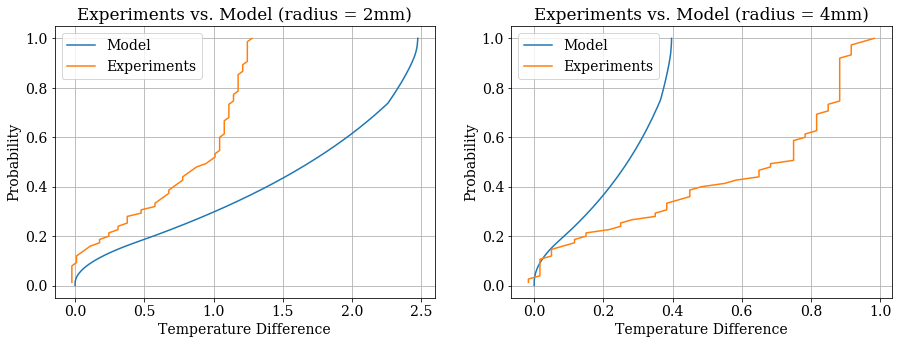

In [92]:
pyplot.figure(figsize=(15,5))
pyplot.subplot(1, 2, 1)
pyplot.title('Experiments vs. Model (radius = 2mm)')
pyplot.xlabel('Temperature Difference')
pyplot.ylabel('Probability')
ecdf = ECDF(avg2)
ecdfE = ECDF(average2[0:130])
pyplot.plot(ecdf.x,ecdf.y, label= "Model")
pyplot.plot(ecdfE.x,ecdfE.y, label= "Experiments")
pyplot.legend()
pyplot.grid()
pyplot.subplot(1, 2, 2)
pyplot.title('Experiments vs. Model (radius = 4mm)')
pyplot.xlabel('Temperature Difference')
pyplot.ylabel('Probability')
ecdf = ECDF(avg4)
ecdfE = ECDF(average4[0:130])
pyplot.plot(ecdf.x,ecdf.y, label= "Model")
pyplot.plot(ecdfE.x,ecdfE.y, label= "Experiments")
pyplot.legend()
pyplot.grid()

0.9995

0.9995